# **2440078411_AlvonDaniloSukardi_LB01_UTS**

##**Kasus II**

###**1a. Gunakan variable-variabel yang ditentukan berikut ini:**

• age,

• sex,

• bmi,

• children,

• smoker,

• region,

• charges (nominal premi asuransi).

Hal pertama, pastinya adalah meng-import library untuk membantu melakukan pemrosesan data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset sudah sesuai requirements dari variabel yang diminta pada soal nomor 1a (age, sex, bmi, children, smoker, region, dan charges), jadi tidak perlu saya ubah terlebih dahulu

In [2]:
df = pd.read_csv('/content/insurance-cost.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


###**1b. Periksa missing values dan jika terdapat missing value, maka isilah missing values tersebut dengan ketentuan sebagai berikut:**
• Variabel yang bersifat continuous diisi dengan nilai rata-rata dari variabel.

• Variabel yang bersifat categorical diisi dengan nilai modus dari variabel.

• Pengisian missing values juga mempertimbangkan jenis kelamin. Artinya, jika nilai variabel yang kosong adalah milik pemegang asuransi berjenis kelamin pria, maka nilai modus atau mean hanya dihitung terhadap samples berjenis kelamin pria.

Terdapat 2 variabel yang memiliki missing values, yaitu bmi sebanyak 2 baris dan smoker sebanyak 2 baris juga

In [3]:
df.isna().sum()

age         0
sex         0
bmi         2
children    0
smoker      2
region      0
charges     0
dtype: int64

*   Karena variabel bmi merupakan data kontinu, maka saya akan mengganti nilai yang kosong dengan mean atau nilai rata - rata dari variabel bmi dengan mempertimbangkan jenis kelaminnya juga pastinya.
*   Sedangkan untuk variabel smoker, karena variabel ini merupakan variabel dengan data kategorikal, maka saya akan mengganti nilai kosong dengan modus atau nilai yang paling banyak muncul dengan mempertimbangkan jenis kelaminnya juga.

Variabel pertama adalah bmi. Pada code di bawah ini saya ingin melihat nilai mean dari variabel bmi jika digrup berdasarkan sex atau jenis kelaminnya. Bisa dilihat bahwa mean dari bmi pada female adalah 30.372829 dan male adalah 30.936230

In [4]:
df['bmi'].groupby(df['sex']).mean()

sex
female    30.372829
male      30.936230
Name: bmi, dtype: float64

Saya ingin melihat letak index dari missing values tersebut dan menampilkan value tersebut untuk memastikan nan value

In [5]:
temp = np.array(df['bmi'])
print(np.argwhere(np.isnan(temp)))

[[30]
 [51]]


In [6]:
print('Index 30 of bmi: ' + str(df['bmi'][30]))
print('Index 30 of sex: ' + df['sex'][30])
print('Index 51 of bmi: ' + str(df['bmi'][51]))
print('Index 51 of sex: ' + df['sex'][51])

Index 30 of bmi: nan
Index 30 of sex: male
Index 51 of bmi: nan
Index 51 of sex: female


Kemudian, saya isi index yang kosong pada variabel bmi dengan mean berdasarkan jenis kelaminnya

In [7]:
df['bmi'].fillna(df.groupby(df['sex'])['bmi'].transform('mean'), inplace=True)

Bisa dilihat pada code di bawah ini bahwa nilai yang awalnya nan berubah menjadi nilai mean berdasarkan gender, dengan nilai yang sama persis yaitu 30.372829 untuk female dan 30.936230 untuk male

In [8]:
print('Index 30 of bmi: ' + str(df['bmi'][30]))
print('Index 30 of sex: ' + df['sex'][30])
print('Index 51 of bmi: ' + str(df['bmi'][51]))
print('Index 51 of sex: ' + df['sex'][51])

Index 30 of bmi: 30.936229629629633
Index 30 of sex: male
Index 51 of bmi: 30.372829046898637
Index 51 of sex: female


Variabel kedua adalah smoker. Pada code di bawah ini saya ingin melihat nilai modus dari variabel smoker jika digrup berdasarkan sex atau jenis kelaminnya. Bisa dilihat bahwa modus dari smoker pada female dan male adalah 'no' yang mengindikasikan bahwa nilai yang banyak muncul pada variabel ini adalah non-perokok

In [9]:
df['smoker'].groupby(df['sex']).agg(pd.Series.mode)

sex
female    no
male      no
Name: smoker, dtype: object

Sama seperti sebelumnya, saya ingin memeriksa index ke berapa yang memiliki value nan. Hanya saja saya harus mengubah datanya dari string ke float terlebih dahulu agar nan value dapat terdeteksi

In [10]:
temp = np.array(df['smoker'])

for i in range(len(temp)):
  if temp[i] == 'yes':
    temp[i] = 1
  elif temp[i] == 'no':
    temp[i] = 0

temp = temp.astype('float64')

print(np.argwhere(np.isnan(temp)))

[[32]
 [53]]


Masih sama seperti sebelumnya, saya menampilkan value dari index di atas untuk memastikan

In [11]:
print('Index 32 of smoker: ' + str(df['smoker'][32]))
print('Index 32 of sex: ' + df['sex'][32])
print('Index 53 of smoker: ' + str(df['smoker'][53]))
print('Index 53 of sex: ' + df['sex'][53])

Index 32 of smoker: nan
Index 32 of sex: female
Index 53 of smoker: nan
Index 53 of sex: male


Kemudian, saya isi nilai kosong dengan modus dari variabel smoker dengan mempertimbangkan jenis kelaminnya pastinya

In [12]:
df['smoker'].fillna(df['smoker'].groupby(df['sex']).agg(pd.Series.mode).mode()[0], inplace=True)

Bisa dilihat pada code di bawah ini bahwa nilai yang awalnya nan berubah menjadi nilai modus berdasarkan gender, dengan nilai yang sama persis yaitu no untuk female dan no untuk male

In [13]:
print('Index 32 of smoker: ' + str(df['smoker'][32]))
print('Index 32 of sex: ' + df['sex'][32])
print('Index 53 of smoker: ' + str(df['smoker'][53]))
print('Index 53 of sex: ' + df['sex'][53])

Index 32 of smoker: no
Index 32 of sex: female
Index 53 of smoker: no
Index 53 of sex: male


Saya ingin memastikan apakah nilai nan sudah terisi dan tidak ada missing values dari variabel smoker dan bmi

In [14]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###**1c. Buat visualisasi terhadap setiap independent variable dan jelaskan hubungan antar setiap independent variables.**

Saya menggunakan countplot karena data smoker, sex/gender, dan region adalah categorical data, serta digunakan untuk menghitung banyaknya data pada suatu variabel
*   Berdasarkan countplot di bawah ini dapat saya simpulkan bahwa pada dataset ini memiliki sample gender yang setara bisa dilihat pada chart kiri banyak female dan male hampir setara, yakni +- 650 untuk setiap gender
*   Selain itu, perokok pada gender male jauh lebih banyak dari perokok pada gender female, hal ini memang tidak cukup mengejutkan mengingat mayoritas perokok adalah laki - laki
*   Terakhir, kebanyakan data pada variabel region adalah seseorang yang berasal dari southeast untuk semua gender, baik male maupun female

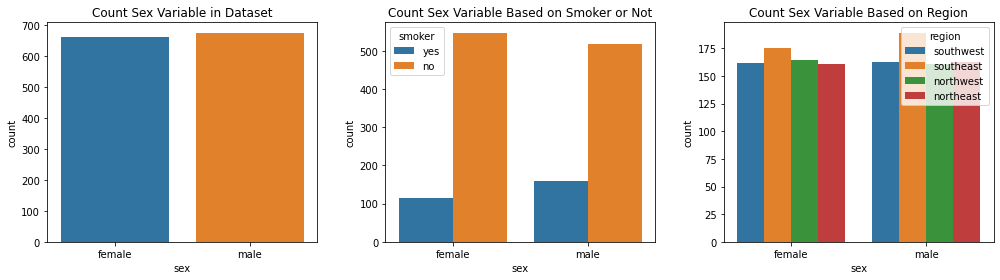

In [15]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.title('Count Sex Variable in Dataset')
sns.countplot(x=df['sex'], data=df)

plt.subplot(1, 3, 2)
plt.title('Count Sex Variable Based on Smoker or Not')
sns.countplot(x=df['sex'], data=df, hue=df['smoker'])

plt.subplot(1, 3, 3)
plt.title('Count Sex Variable Based on Region')
sns.countplot(x=df['sex'], data=df, hue=df['region'])

plt.tight_layout()
plt.show()

Saya menggunakan boxplot dan histogram untuk memvisualisasikan distribusi nilai dari variabel age untuk melihat persebaran data pada variabel tersebut.

Untuk age, dapat saya simpulkan bahwa rata - rata dan nilai tengah umur pada dataset berada pada usia 39 tahun sehingga rata - rata datasetnya mengambil data orang dewasa hal ini diperkuat dengan Q1 di angka 27 dan Q3 di angka 51. Usia terendahnya adalah 18 tahun dan usia maksimalnya 64 tahun

Pada histogram, dapat dilihat bahwa frekuensi nilai terbanyak ada pada usia +- 20 tahun yang hampir mencapai 200 data pada usia tersebut. Hal ini juga dapat mengakibatkan probability pada usia ini akan sangat tinggi

In [16]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

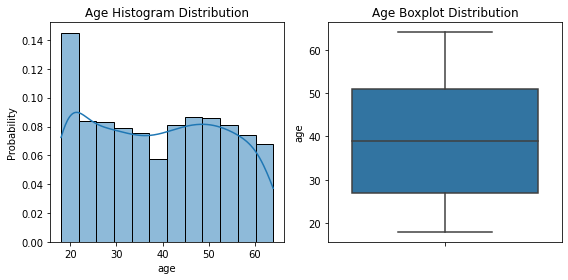

In [17]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x=df['age'], kde=True, stat = 'probability')
plt.title('Age Histogram Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y=df['age'])
plt.title('Age Boxplot Distribution')

plt.tight_layout()
plt.show()

Sedangkan untuk bmi, saya menggunakan boxplot karena boxplot sangat cocok digunakan untuk memvisualisasikan persebaran data kontinu.

Dapat saya simpulkan bahwa variasi nilai lebih sedikit daripada age, ditandai dengan nilai std yang lebih kecil dan selisih Q3 dan Q1 yang lebih sedikit juga mengingat variasi nilai bmi juga tidak sebanyak variasi umur. Median dan mean memiliki nilai yang mirip di angka 30.5, maka rata - rata datanya adalah orang obesitas, dengan nilai minimum di angka 15.9 (orang kurus) dan nilai maksimal di angka 53.1 (terlalu obesitas). Jika dilihat pada boxplot kanan, terdapat beberapa nilai outlier pada angka >47 mengingat orang dengan bmi tersebut sangat sedikit dan sangat jarang ditemui. Untuk persebaran datanya, data pada variabel ini cenderung miring (skew) ke kiri

In [18]:
df['bmi'].describe()

count    1338.000000
mean       30.657477
std         6.096159
min        15.960000
25%        26.296250
50%        30.386415
75%        34.656250
max        53.130000
Name: bmi, dtype: float64

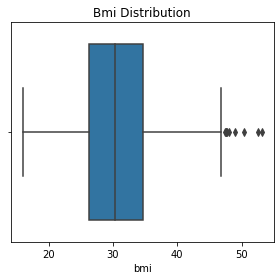

In [19]:
plt.figure(figsize=(4, 4))
sns.boxplot(data=df, x=df['bmi'])
plt.title('Bmi Distribution')

plt.tight_layout()
plt.show()

Untuk variabel children saya menggunakan histogram karena datanya berupa data diskrit. Dapat saya simpulkan bahwa jumlah orang menjadi semakin sedikit seiring bertambahnya jumlah anak. Hal ini merupakan hal yang lumrah karena setiap orang mempunyai keinginannya masing - masing.

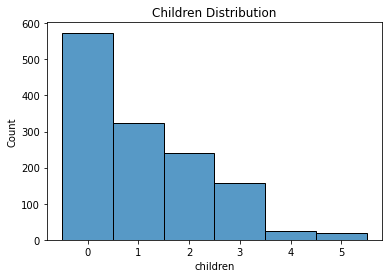

In [20]:
sns.histplot(data=df, x=df['children'], discrete=True)
plt.title('Children Distribution')
plt.show()

Untuk mencari korelasi antar setiap variabel independen, maka saya akan meng-encode variabel - variabel yang non numerik karena untuk mendapatkan nilai korelasi harus berupa data numerik.

Disini saya menggunakan encode OneHotEncoder melalui fungsi get_dummies karena variabel kategori pada sex, smoker, dan region bukan merupakan data ordinal yang terdapat urutan kategorinya, melainkan data nominal

In [21]:
independent_df = df.iloc[:, [0, 2, 3]].join(pd.get_dummies(df[['sex', 'smoker', 'region']]))

independent_df.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


Saya menggunakan heatmap untuk memvisualisasikan hubungan korelasi antar setiap independen variabel. Semakin terang warnanya semakin tinggi korelasi antar variabel, semakin gelap warnanya semakin kecil korelasinya.

Alasan saya tidak menggunakan pairplot adalah karena adanya beberapa variabel kategorikal seperti smoker_no, smoker_yes, dan lain - lain, yang dapat membuat scatter plot pada pairplot terlihat kurang menarik dan tidak memberikan insight lebih dalam analisis data.

Bisa dilihat bahwa ada beberapa variabel yang memiliki korelasi dengan variabel yang lainnya seperti:


*   Age dan Bmi
*   Region_southeat dan Bmi

Namun hal ini tidak menjadi masalah karena nilai korelasi masih di bawah 0.7, karena menurut (https://medium.com/@kdorsain/dealing-with-multicollinearity-of-features-2b13bc42fbe1), hubungan variabel yang menandakan multikolinaritas adalah hubungan yang memiliki nilai 0.7 ke atas


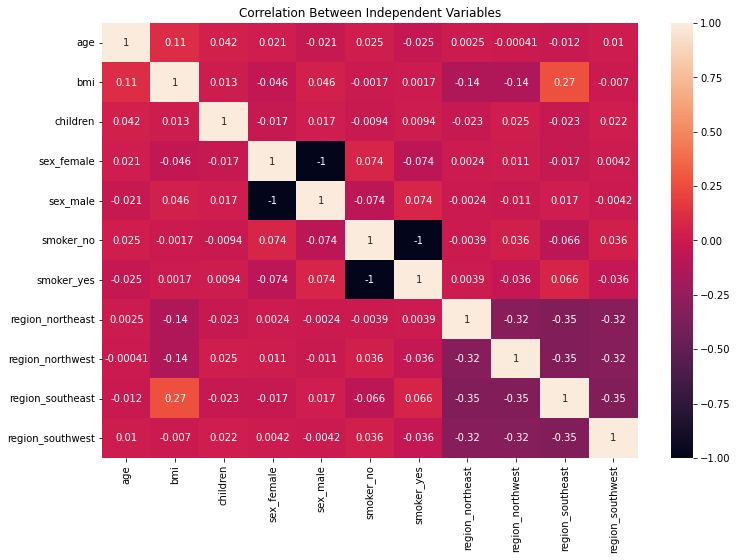

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(independent_df.corr(), annot=True)
plt.title('Correlation Between Independent Variables')

plt.show()

### **1d. Buat grafik correlation antara setiap independent variable dengan dependent variable. Lalu jelaskan masing-masing correlation tersebut!**

Sama seperti sebelumnya, saya tidak menggunakan pairplot adalah karena adanya beberapa variabel kategorikal seperti smoker_no, smoker_yes, dan lain - lain. Sehingga kurang cocok apabila dikorelasikan dengan scatter plot dari axis variabel charges (dependent) yang merupakan data kontinu

Untuk korelasi antar dependen dan independen variabel bisa dilihat pada baris terakhir serta kolom terakhir pada heatmap. Dapat saya simpulkan bahwa korelasi tertinggi terdapat pada variabel smoker_yes yang mengindikasikan jika seseorang adalah perokok maka memiliki nilai premi asuransi yang semakin tinggi

Di samping itu variabel age juga memiliki korelasi yang cukup tinggi dengan label data (charges), yang mengindikasikan bahwa semakin bertambahnya usia, maka nilai preminya semakin tinggi

In [23]:
new_df = independent_df.join(df.iloc[:, 6])

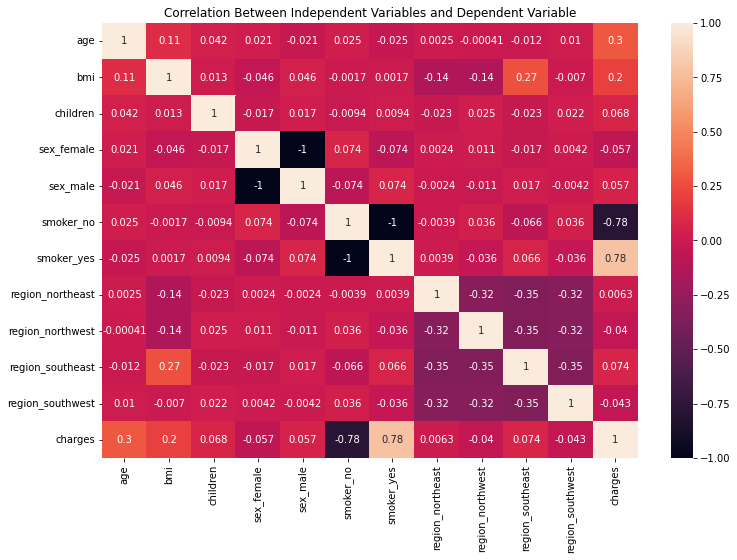

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(new_df.corr(), annot=True)
plt.title('Correlation Between Independent Variables and Dependent Variable')

plt.show()

###**2. Buatlah Training Set dan Test Set dengan proporsi 4:1, lalu tampilkan Training Set.**

Hal pertama yang saya lakukan adalah menyeleksi variabel dependen (y) dan independennya (x)

In [25]:
x = new_df.iloc[:, :-1]
y = new_df.iloc[:, [-1]]

Kemudian memisahkan training dataset dan testing dataset dengan proposi yang sudah ditentukan, yaitu 4:1 atau training set sebanyak 80% dan testing set sebanyak 20%

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print('x_train shape: ' + str(x_train.shape))
print('x_test shape: ' + str(x_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: ' + str(y_test.shape))

x_train shape: (1070, 11)
x_test shape: (268, 11)
y_train shape: (1070, 1)
y_test shape: (268, 1)


Kemudian dilakukan proses normalisasi dengan menggunakan StandardScaler agar persebaran data pada training dan testing dataset lebih merata. Karena data labelnya adalah data kontinu, maka perlu dinormalisasi juga

In [27]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(x_train)
scalery = StandardScaler().fit(y_train)
x_train = scalerX.transform(x_train)
y_train = scalery.transform(y_train)
x_test = scalerX.transform(x_test)
y_test = scalery.transform(y_test)

Lalu, menampilkan training set (x_train dan y_train)

In [28]:
print(x_train)

[[-0.14853305  0.54671611  2.41394802 ... -0.55791981 -0.6155209
   1.70862925]
 [-1.49780784  0.60010403 -0.89219519 ... -0.55791981  1.6246402
  -0.58526447]
 [-1.14273553  0.96249481  0.76087642 ... -0.55791981 -0.6155209
  -0.58526447]
 ...
 [ 0.06451033 -0.91255391 -0.89219519 ... -0.55791981  1.6246402
  -0.58526447]
 [-1.42679338  0.77806379 -0.89219519 ...  1.79237229 -0.6155209
  -0.58526447]
 [-0.4325909  -1.97707683 -0.06565939 ... -0.55791981 -0.6155209
   1.70862925]]


In [29]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [30]:
print(y_train)

[ 2.25338687 -1.00752925  2.11386131 ... -0.65022604 -0.96502226
 -0.70448219]


### **3a. Lakukan prediksi menggunakan test set.**


Untuk melakukan prediksi, hal pertama yang harus dilakukan adalah melakukan training data dengan algoritma linear regression dengan meng-import library sklearn.linear_model. Kemudian melakukan fit untuk x_train terhadap y_train

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train, y_train)

Sebelum melakukan prediksi, data yang ada pada y_test harus dilakukan scaled back terlebih dahulu agar menjadi nilai premi awal. Kemudian saya membuat variabel y_pred untuk memprediksi harga premi melalui x_test

In [32]:
y_test_real = scalery.inverse_transform(y_test.reshape(-1, 1))
y_pred = model.predict(x_test)

Hal yang sama juga berlaku untuk y_pred setelah melakukan predict melalui nilai x_test yang sudah dinormalisasi, maka value y_pred juga harus dilakukan scaled back agar bisa memprediksi nilai premi yang sesungguhnya dan bisa dibandingkan dengan y_test

In [33]:
y_pred_real = scalery.inverse_transform(y_pred.reshape(-1, 1))

###**3b. Tampilkan hasil prediksi tersebut dan nilai sebenarnya dari test set.**

Disini pertama saya ubah dimensi dari y_test dan y_pred menjadi 1d array, kemudian saya input setiap value yang ada pada y_test ke kolom Actual Charges atau value asli dari charges, sedangkan value pada y_pred saya input ke kolom Prediction Charges sebagai prediksi dari charges pada y_test

In [34]:
result = pd.DataFrame()
result['Actual Charges'] = y_test.flatten()
result['Prediction Charges'] = y_pred.flatten()

result.head()

,Actual Charges,Prediction Charges
0,-0.290361,-0.172979
1,-0.388647,-0.372198
2,2.714384,2.127802
3,-0.020972,0.276240
4,-0.297065,-0.497198


###**4a. Tampilkan persamaan regresi.**

Untuk menampilkan persamaan regresi hal pertama yang harus dilakukan adalah harus mengetahui coefficient dan intercept modelnya terlebih dahulu agar mendapatkan persamaan **y = intercept + coefficient_1 * x_1 + .... + coefficient_n * x_n**

In [35]:
coef = model.coef_
intercept = model.intercept_

Kemudian, saya tampilkan persamaan regresi linear dengan menginput intercept dan setiap index coefficient yang ada dalam bentuk string agar dapat dibaca

In [36]:
print('y = ' + str(intercept) + ' + ', end="")
for i in range(len(coef)):
  if i == (len(coef) - 1):
    print(str(coef[i]) + ' * X' + str(i+1))
    break
  print(str(coef[i]) + ' * X' + str(i+1) + ' + ', end="")

y = -0.0011040085517098745 + 0.296649959325387 * X1 + 0.1747687042480675 * X2 + 0.04180327678852822 * X3 + -8258427001667.395 * X4 + -8258427001667.399 * X5 + 6016639857117.163 * X6 + 6016639857117.967 * X7 + 34090463374070.82 * X8 + 34326030970451.39 * X9 + 36013570275630.414 * X10 + 35169981228689.55 * X11


###**4b. Buatlah evaluasi terhadap coefficient untuk setiap variabel.**

Berikut saya berikan nilai - nilai setiap coefficient untuk setiap variabel x yang ada


*   Jika koefisien bernilai positif, maka mengindikasikan bahwa jika variabel untuk prediksi meningkat, maka variabel respon juga meningkat
*   Jika koefisien bernilai negatif, maka mengindikasikan bahwa jika variabel untuk prediksi meningkat, maka variabel respon menurun

Nilai koefisien mewakili perubahan rata-rata dalam respons yang diberikan perubahan satu unit dalam prediktor. Misalnya, jika koefisien variabel age adalah 0.3 (dibulatkan), maka nilai respons rata-rata meningkat sebanyak 0.3 untuk setiap perubahan satu unit dalam prediktor.

In [37]:
for i in range(len(coef)):
  print(str(new_df.columns[i]) + ': ' + str(coef[i]))

age: 0.296649959325387
bmi: 0.1747687042480675
children: 0.04180327678852822
sex_female: -8258427001667.395
sex_male: -8258427001667.399
smoker_no: 6016639857117.163
smoker_yes: 6016639857117.967
region_northeast: 34090463374070.82
region_northwest: 34326030970451.39
region_southeast: 36013570275630.414
region_southwest: 35169981228689.55


###**4c. Buatlah evaluasi dari hasil nilai prediksi menggunakan beberapa metrics evaluasi, seperti MAE, MSE, RMSE, dan R2.**

MAE (Mean Absolute Error) merupakan rata - rata nilai kesalahan atau error antara nilai sebenarnya dengan nilai prediksinya dengan formula:

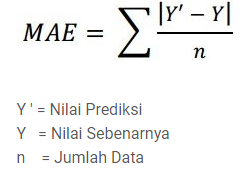

MSE (Mean Square Error) merupakan kesalahan kuadrat rata - rata antara nilai sebenarnya dan nilai prediksinya dengan formula:

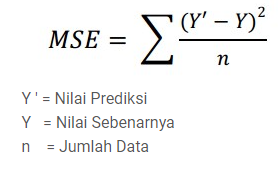

RMSE merupakan akar kuadrat dari MSE. Perbedaannya adalah pada RMSE, skala kesalahan atau error dibuat sama dengan skala target dengan formula:

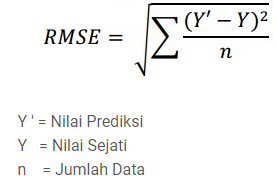

R^2 (R Squared) merupakan metode lainnya dalam pengukuran model yang memiliki kaitan juga dengan MSE. Perbedaannya pada R^2 skala pengukurannya memiliki nilai antara -∞ hingga 1 dengan formula:

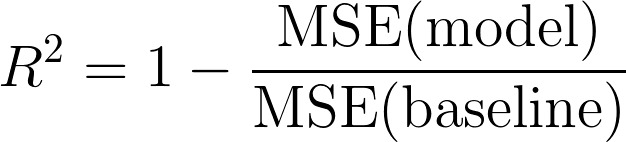

Dari keempat pengukuran model ini, hanya R^2 saja yang menandakan jika semakin tinggi nilainya maka model semakin baik. Sedangkan pada MAE, MSE, dan RMSE jika nilainya semakin kecil maka semakin baik nilainya karena mereka mengukur dari selisih kesalahan prediksinya sehingga jika semakin kecil nilainya maka semakin kecil selisih kesalahannya

In [38]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('Normalization Charges Value:')
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2: ', r2_score(y_test, y_pred))

Normalization Charges Value:
MAE:  0.33475141852375295
MSE:  0.24565456886264275
RMSE:  0.49563552017853074
R^2:  0.7786805868893001


In [39]:
print('Real Charges Value:')
print('MAE: ', mean_absolute_error(y_test_real, y_pred_real))
print('MSE: ', mean_squared_error(y_test_real, y_pred_real))
print('RMSE: ', np.sqrt(mean_squared_error(y_test_real, y_pred_real)))
print('R^2: ', r2_score(y_test_real, y_pred_real))

Real Charges Value:
MAE:  4008.166353304893
MSE:  35218549.869460635
RMSE:  5934.521873703107
R^2:  0.7786805868893001


###**4d. Jelaskan hasil dari metrics evaluasi yang dilakukan pada tahapan sebelumnya.**


Berdasarkan hasil pengukuran model pada code di atas dapat saya simpulkan bahwa model sudah memiliki akurasi yang cukup baik dan dapat ditingkatkan lagi dengan menghapus data outlier salah satunya. Hal ini ditandai pada MAE, MSE, dan RMSE yang memiliki nilai cukup kecil pada prediksi real charges value dan nilai yang sangat kecil pada prediksi normalization value (MAE 0.2, MSE0.3, RMSE 0.5). 

Disini saya akan lebih berfokus kepada real charges value karena merepresentasikan nilai charges aslinya. Dengan nilai MAE pada real charges value sebesar 4008, maka rata - rata perbedaan nilai aktual dan nilai prediksi adalah sekitar 4000. Hal yang sama juga terdapat pada RMSE karena data label adalah data kontinu maka RMSE 5934 tidak begitu buruk. Hal ini diperkuat lagi dengan nilai R squared sebanyak 0.78 dan sangat mendekati angka 1. Karena R Squared digunakan untuk menjelaskan seberapa baik variabel independen dalam model linear regression dapat menjelaskan variabilitas pada variabel dependen, jadi dengan angka segitu modell sudah bisa memprediksi nilai charges dengan baik

###**5. Buatlah plot yang sesuai untuk menggambarkan hasil dari Predicted Value vs Measure/Actual Value**

Saya menggunakan scatter plot untuk melihat persebaran data antara nilai aktual dan nilai prediksi dengan jelas. Chart kiri untuk melihat nilai aktual dan nilai prediksi dari Y yang sudah dinormalisasi, sedangkan chart kanan untuk melihat nilai aktual dan nilai prediksi dari Y yang belum dinormalisasi (nilai aslinya)

Sebenarnya hanya terdapat sedikit error yang tersebar di samping diagonal grafik, tetapi terdapat perbedaan nilai yang besar antara nilai aktual dan nilai prediksi sehingga mempengaruhi evaluasi model sebelumnya. Untuk peningkatan memang harus membersihkan nilai outlier seperti yang sudah saya singgung sebelumnya. 

Di samping itu, sudah terdapat banyak data yang berkumpul di diagonal grafik yang mengindikasikan bahwa perbedaan nilai aktual dan prediksi yang kecil

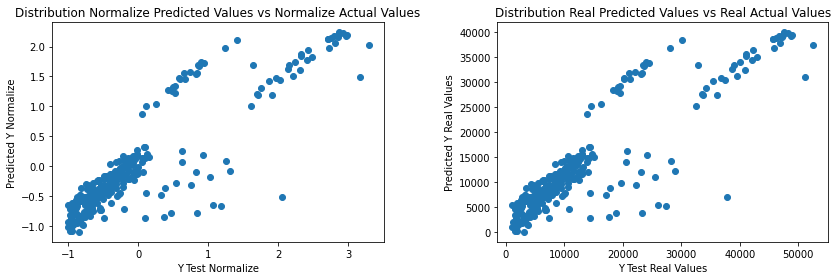

In [40]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test Normalize')
plt.ylabel('Predicted Y Normalize')
plt.title('Distribution Normalize Predicted Values vs Normalize Actual Values')

plt.subplot(1, 2, 2)
plt.scatter(y_test_real, y_pred_real)
plt.xlabel('Y Test Real Values')
plt.ylabel('Predicted Y Real Values')
plt.title('Distribution Real Predicted Values vs Real Actual Values')

plt.tight_layout()
plt.show()